In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
data=pd.read_csv('50_Startups.csv')
data.head()
new_data=data.drop(['State'],axis=1)
new_data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


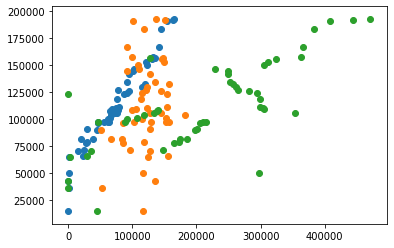

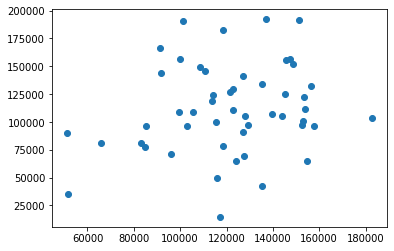

In [27]:
plt.scatter(data['Administration'],data['Profit'])


In [7]:
new_data['R&D Spend']=new_data['R&D Spend']/new_data['R&D Spend'].max()
new_data['Administration']=new_data['Administration']/new_data['Administration'].max()
new_data['Marketing Spend']=new_data['Marketing Spend']/new_data['Marketing Spend'].max()
new_data['Profit']=new_data['Profit']/new_data['Profit'].max()

In [18]:
X=new_data.iloc[:,:3]
Y=new_data.iloc[:,[-1]]


x_train=X.iloc[:40,]
y_train=Y.iloc[:40,].values
x_test=X.iloc[40:,].values
y_test=Y.iloc[40:,]
y_test.shape
y=y_train
m,k=x_train.shape
x_train

,R&D Spend,Administration,Marketing Spend
0,1.000000,0.749527,1.000000
1,0.983359,0.828805,0.940893
2,0.927985,0.553781,0.864664
3,0.873136,0.649738,0.812235
4,0.859438,0.500378,0.776136
5,0.797566,0.546494,0.769126
6,0.814128,0.805926,0.270710
7,0.788018,0.796789,0.686493
8,0.729018,0.814249,0.660500
9,0.745906,0.595028,0.646443


In [9]:
x=np.c_[np.ones([m,1]),x_train]


In [10]:
def initialize_parameters():
    w=np.ones([x.shape[1],1])
    return w
w=initialize_parameters()
w.shape

(4, 1)

In [11]:
def cost_function(x,y,w):
    
    J=np.sum(((x@ w)-y)**2)/(2*m)
    return J


In [12]:
def gradientDescent(x,y,w,alpha,num_iters):
    m=x_train.shape[0]
    cost_func_matrix=np.zeros([num_iters,1])
    for i in range(num_iters):
        w=w- ((alpha/m) * (((x @ w) - y).transpose() @ x).transpose())
        cost_func_matrix[i]=cost_function(x,y,w)      
    return (w,cost_func_matrix)

In [13]:
w,cost=gradientDescent(x,y,w,0.001,200000)

In [14]:
w

array([[0.25946674],
       [0.61916109],
       [0.00711519],
       [0.10891199]])

In [15]:
cost

array([[2.18649869e+00],
       [2.17760203e+00],
       [2.16874163e+00],
       ...,
       [7.16658100e-04],
       [7.16657325e-04],
       [7.16656550e-04]])

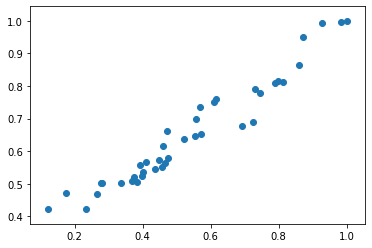

In [31]:

plt.scatter(x_train['R&D Spend'],y)
#plt.scatter(x_train['Marketing Spend'],y)
#plt.scatter(x_train['Administration'],y)


Text(0.5, 1.0, 'csot vs iteration?')

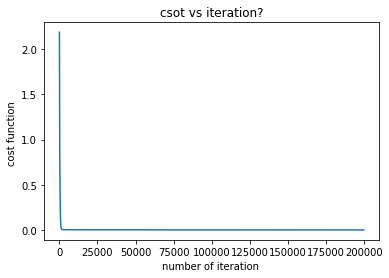

In [17]:
iteration=np.arange(1,200001)

plt.plot(iteration,cost)
plt.xlabel('number of iteration ')
plt.ylabel('cost function ')
plt.title('csot vs iteration?')


In [20]:
def predict(x1,x2,x3,x4):
    x1=x1
    x2=x2/165349.2
    x3=x3/182645.56
    x4=x4/471784.1
    x=np.array([x1,x2,x3,x4])
    p=(x@w)*192261.83
    return p


In [21]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [23]:
predict(1,1000.23,124153.04,1903.93)

array([51620.04016424])